### Example of curating DTC data using CYP3A4 (FRCE)

Written by Titli Sarkar (titli.sarkar@nih.gov) on March 3, 2023

Simplified data curation steps for raw data pulled from DTC.

Data location (on FRCE): Initial dataset downloaded from Drug Target Commons (DTC) database and stored below:

1> cd /mnt/projects/ATOM/sarkart4/CYP_Data_Curation/data/

   mkdir dtc
   
   cd dtc

2> wget https://drugtargetcommons.fimm.fi/static/Excell_files/DTC_data.csv
   
   ### **Be careful to not overwrite previous versions. Default behavior should be to create a new version.
   
   ### **Note the file seems to be last updated March  2023.
   
     The initial downloaded file name will be DTC_data.csv. Check it with $ls 
   
     $ wc -l DTC_data.csv  -> 5981099  (size of the full DTC database)
   
     $ grep CYP3A4 DTC_data.csv | wc -l ->  47075 (size of the CYP3A4 in DTC database)
   
     You can check other CYP's also:
   
       $ grep CYP2D6 DTC_data.csv | wc -l -> 30057

       $ grep CYP2C9 DTC_data.csv | wc -l -> 28268

3> grep CYP3A4 DTC_data.csv > raw_data.txt

4> head -1 DTC_data.csv > header

5> cat header raw_data.txt > cyp3a4.csv

### **Data File: cyp3a4.csv

Note the "ACTION" in comments 

Using data_curation_functions.py


In [4]:
#import sys
import atomsci.ddm.utils.data_curation_functions as dcf

In [20]:
import importlib as imp
import pandas as pd
import numpy as np

In [6]:
target = 'CYP3A4'

In [11]:
data_dir = "/mnt/projects/ATOM/sarkart4/CYP_Data_Curation/data/dtc/"
file= data_dir + target.lower()+'.csv'
!ls $data_dir

orig_df=pd.read_csv(file,sep=",",engine="python",error_bad_lines=False)
print(orig_df.shape)
orig_df.head()

cyp3a4.csv  DTC_data.csv  header  raw_data.txt


/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(47075, 33)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,compound_concentration_value_unit,substrate_type,substrate_relation,substrate_value,substrate_units,assay_description,title,journal,doc_type,annotation_comments
0,CHEMBL268868,AAALVYBICLMAMA-UHFFFAOYSA-N,DAPH,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors an...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN
1,CHEMBL268868,AAALVYBICLMAMA-UHFFFAOYSA-N,DAPH,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: qHTS Assay for Activators of...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN
2,CHEMBL1800663,AAAOTGDHZDZLFN-UHFFFAOYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,21657270.0,...,NaN,NaN,NaN,NaN,NaN,Inhibition of human CYP3A4 assessed as convers...,"Discovery of 1-{4-[1-(2,6-difluorobenzyl)-5-[(...",J. Med. Chem.,PUBLICATION,NaN
3,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,24015967.0,...,NaN,NaN,NaN,NaN,NaN,Inhibition of human CYP3A4,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN
4,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,24015967.0,...,NaN,NaN,NaN,NaN,NaN,Time-dependent inhibition of human CYP3A4,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN


In [12]:
orig_df.columns

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments'],
      dtype='object')

In [18]:
# Save raw file in FRCE from pandas format
!mkdir $data_dir'raw/'
orig_df.to_csv(data_dir+ 'raw/cyp3a4.csv',index=False)

In [19]:
for v in orig_df['standard_units'].unique() :  
    t=orig_df[orig_df['standard_units']==v]
    print(v,t.shape)

NM (31280, 33)
% (2991, 33)
nan (0, 33)
/MIN (108, 33)
UM (11, 33)
MIN-1 (56, 33)
/UM/MIN (26, 33)
MM (7, 33)
/MIN/MM (1, 33)
ML.MIN-1.G-1 (3, 33)
PMOL/MIN (13, 33)
NG/ML (1, 33)
L/MIN/UMOL (9, 33)
UL/MIN (11, 33)
HR (17, 33)
MIN (12, 33)
/MIN/MICROM (3, 33)
/MIN/NM (4, 33)
/S (20, 33)
DEGREES C (11, 33)
UL/MIN/NMOL (2, 33)
PMOL/MIN/PMOL (2, 33)
UG.ML-1 (3, 33)
ML/MIN/UMOL (1, 33)
10'-4/MIN (3, 33)
UL/MIN/PMOL (3, 33)
ML/MIN/NMOL (3, 33)
PMOL/HR (4, 33)
PMOL/MG.MIN (2, 33)
UL/MIN.MG (2, 33)
NMOL/MIN (16, 33)
/NM.MIN (2, 33)
MOL/MIN (2, 33)
NMOL/MIN/MG (3, 33)
10'3ML/MIN (3, 33)
ML/MIN/MG (3, 33)
UL.MIN.NMOL-1 (1, 33)
PMOL.MIN.MG-1 (1, 33)
UL/MG/MIN (2, 33)
ML/MIN/UL (2, 33)


### Obtain unique standard_inchi_key

In [21]:
imp.reload(dcf)
geneNames = [target.upper()]

nm_df = dcf.filter_dtc_data(orig_df,geneNames) ## --> DTC specific function
#Note: AMPL supports extraction of JAK1, 2, and 3 datasets from DTC

print(nm_df.shape)
myList=nm_df['standard_inchi_key'].unique().tolist()

print(len(myList))

(6484, 33)
5412


## Retrieve SMILES strings for compounds through PUBCHEM web interface.

## TURN NEXT CELL TO TEXT TO AVOID RE-RUNNING (unintentionally)

In [27]:
import imp
import atomsci.ddm.utils.pubchem_utils as pu
imp.reload(pu)
ofile = data_dir + 'save_smiles_'+target.lower()+'_nm_raw.csv'

## this is slow, so don't re-do if the SMILES are already downloaded
#if not -e ofile :
save_smiles_df,fail_lst,discard_lst=pu.download_smiles(myList)
save_smiles_df.to_csv(ofile)

In [29]:
print(len(fail_lst))
print(save_smiles_df.shape)
# 484
#(16670, 3)

2983
(2429, 4)


In [30]:
ifile = data_dir + 'save_smiles_'+target.lower()+'_nm_raw.csv'
save_smiles_df=pd.read_csv(ifile)
save_smiles_df.head()

,Unnamed: 0,CID,standard_inchi_key,smiles
0,0,46943432,AAAQFGUYHFJNHI-SFHVURJKSA-N,"""CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C..."
1,1,11533340,AADUJBXZMSDOOW-UHFFFAOYSA-N,"""C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC..."
2,2,11964036,AATCBLYHOUOCTO-UHFFFAOYSA-N,"""CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2..."
3,3,70685377,AAVAYKQPRIQKRX-UHFFFAOYSA-N,"""CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=..."
4,4,23642319,ABACVOXFUHDKNZ-UHFFFAOYSA-N,"""CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C..."


## Retrieve specific CYP3A4 data
## Will include censored data in smiles 
## Combine gene data with SMILES strings and call this our starting "raw" dataset.

In [41]:
imp.reload(dcf)
targ_lst=[target.upper()]
smiles_lst, shared_inchi_keys = dcf.get_smiles_dtc_data(nm_df,targ_lst,save_smiles_df) # This function calculates pIC50 and adds in data
# Combine gene data with SMILES strings and call this our starting "raw" dataset.
# This is designed for combining JAK1, JAK2 and JAK3.
smiles_df=pd.concat(smiles_lst) # smiles_lst -> returns full dataframe in list form. pd.concat() transforms it to a datframe format
print(smiles_df.shape)

CYP3A4 distinct compounds = only 3308
CYP3A4 distinct compounds <,>,= 5412
num shared compounds 5412
Add pIC50 values.
3        33000.0
15       10000.0
56       10000.0
59        1500.0
67       10000.0
          ...   
46293     5500.0
46294    18000.0
46314    27000.0
46356     1500.0
46359    28000.0
Name: standard_value, Length: 6484, dtype: float64
33000.0
10000.0
10000.0
1500.0
10000.0
10000.0
10000.0
4900.0
14000.0
3500.0
3500.0
4700.0
6300.0
50000.0
140.0
130.0
3210.0
47.0
18000.0
1500.0
21000.0
580.0
8000.0
12000.0
20000.0
10000.0
11000.0
2420.0
274.0
54680.0
830.0
10000.0
10000.0
30000.0
1000.0
40000.0
30000.0
10000.0
10000.0
10000.0
14200.0
30000.0
1000.0
210.0
50000.0
4000.0
5000.0
2200.0
230.0
10000.0
30000.0
16900.0
3600.0
38.0
13000.0
70.0
240.0
600.0
90.0
9300.0
30000.0
3386.0
700.0
40000.0
640.0
53810.0
10000.0
35970.0
10000.0
20000.0
90000.0
50000.0
450.0
1600.0
10000.0
560.0
1900.0
2.4
1670.0
1400.0
5000.0
10000.0
3000.0
6200.0
5000.0
5000.0
10000.0
3000.0
10000.0
2

3000.0
15000.0
17000.0
10000.0
20000.0
42000.0
2600.0
21000.0
740.0
10000.0
15000.0
5100.0
10000.0
27.0
68.0
650.0
2100.0
18.0
30000.0
40000.0
2500.0
24000.0
50000.0
3000.0
1790.0
1330.0
300.0
30000.0
150.0
50000.0
24000.0
400.0
400.0
30000.0
11000.0
30000.0
1500.0
10000.0
300.0
17000.0
30000.0
30000.0
17890.0
30000.0
1600.0
4700.0
5000.0
51900.0
10000.0
1200.0
50000.0
50.0
4050.0
4600.0
30000.0
30000.0
5000.0
5000.0
10000.0
10000.0
49000.0
11900.0
60.0
11000.0
10000.0
10000.0
250.0
52.0
50000.0
1000000.0
36000.0
11000.0
10000.0
50000.0
46300.0
50000.0
1000.0
100000.0
100000.0
350.0
82.0
50.0
10000.0
10000.0
20000.0
100000.0
10000.0
10000.0
50000.0
50000.0
10000.0
10000.0
5000.0
20000.0
2300.0
1000.0
770.0
25000.0
79200.0
4700.0
22000.0
1000.0
2700.0
6300.0
33000.0
18000.0
120.0
25000.0
12700.0
2530.0
17900.0
5500.0
32000.0
100.0
8200.0
470.0
2000.0
30000.0
8500.0
4800.0
8100.0
10000.0
3500.0
10000.0
400.0
10700.0
260.0
10000.0
50000.0
1200.0
3400.0
10000.0
23.0
2110.0
2480.0
10000.0
3

50118.72
30000.0
1600.0
7300.0
140.0
2010.0
5800.0
47100.0
1300.0
5600.0
800.0
430.53
50.0
3400.0
5000.0
2000.0
1200.0
4900.0
10000.0
5000.0
27000.0
100000.0
100000.0
10000.0
1500.0
2050.0
500.0
250.0
2510.0
2610.0
2910.0
800.0
14000.0
10000.0
2530.0
600.0
25000.0
10000.0
10000.0
30000.0
53000.0
64000.0
11000.0
35000.0
1200.0
50000.0
20000.0
20000.0
33000.0
25000.0
140.0
1870.0
10000.0
4100.0
66.0
48000.0
1000.0
10000.0
40000.0
200.0
30.0
320.0
320.0
10000.0
30000.0
4000.0
348.0
30000.0
30000.0
2.0
14000.0
23000.0
29000.0
30000.0
700.0
800.0
50000.0
5000.0
10000.0
480.0
6700.0
10000.0
9400.0
8000.0
15000.0
10000.0
10000.0
4500.0
100000.0
100000.0
1000.0
11400.0
2345.0
10000.0
195000.0
8200.0
33100.0
20000000.0
136.0
10000.0
5000.0
40000.0
100000.0
10000.0
10000.0
2100.0
2190.0
10000.0
50.0
50000.0
6150.0
710.0
19000.0
9000.0
12200.0
36400.0
800.0
4300.0
40000.0
500.0
16000.0
20000.0
33000.0
61000.0
7998.34
50000.0
1300.0
7000.0
40000.0
8600.0
18600.0
26800.0
7000.0
40000.0
5400.0
7500.

(2880, 38)
2429
(2880, 38)


In [42]:
# Save file to FRCE
smiles_df.to_csv(data_dir + 'raw/' + target.lower()+ '_dtc_smiles.csv',index=False)

In [43]:
print(smiles_df.shape)
smiles_df.head()

(2880, 38)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,24015967.0,...,Inhibition of human CYP3A4,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,22039836.0,...,Inhibition of CYP3A4,Optimization of a potent class of arylamide co...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,23855836.0,...,Inhibition of CYP3A4 (unknown origin),"1-substituted (Dibenzo[b,d]thiophen-4-yl)-2-mo...",J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,22386529.0,...,Inhibition of CYP3A4,From ApoA1 upregulation to BET family bromodom...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.823909,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,19419141.0,...,Inhibition of CYP3A4,Discovery of 4-(5-(4-chlorophenyl)-2-methyl-3-...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...


### Apply ATOM standard 'curation' step: Average replicate assays, remove duplicates and drop cases with large variance between replicates.


### Use atom_curation()

In [44]:
imp.reload(dcf)
curated_lst = dcf.atom_curation(targ_lst, smiles_lst, shared_inchi_keys)

gene_names ['CYP3A4']
standard_type ['IC50']
standard_relation ['=']
before (1766, 38)
Bad duplicates removed from dataset
Dataframe size (1677, 42)

Dataset de-duplicated
Dataframe size (1417, 42)
New column created with averaged values:  VALUE_NUM_mean
After (1417, 42) # of dropped compounds 3995


### Use average_and_remove_duplicates() 

In [53]:
data=smiles_df
column = 'PIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# note: checked that this is already curated
[check_df.shape]
check_df.head()

Bad duplicates removed from dataset
Dataframe size (2773, 42)
List of 'bad' duplicates removed
        compound_id     PIC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
2326  CHEMBL1077339  6.301030        7.801030  19.228230       2.121320
865   CHEMBL1080472  5.522879        4.784318  15.437114       1.044482
866   CHEMBL1080472  4.045757        4.784318  15.437114       1.044482
2534  CHEMBL1081504  5.055517        4.527759  11.656069       0.746363
2535  CHEMBL1081504  4.000000        4.527759  11.656069       0.746363
...             ...       ...             ...        ...            ...
1852   CHEMBL561132  5.154902        4.640116  11.094240       0.343190
376        CHEMBL91  5.301030        6.083357  12.860124       0.790869
378        CHEMBL91  6.744727        6.083357  10.871796       0.790869
380        CHEMBL91  7.000000        6.083357  15.068040       0.790869
377        CHEMBL91  5.301030        6.083357  12.860124       0.790869

[107 rows x 5 columns]

Dataset de-dupli

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,24015967.0,...,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,4.481486,NaN,0.0,0
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,22039836.0,...,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,5.000000,NaN,0.0,0
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,23855836.0,...,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,5.000000,NaN,0.0,0
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,22386529.0,...,NaN,5.823909,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,5.823909,NaN,0.0,0
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,19419141.0,...,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,5.000000,NaN,0.0,0


### Use aggregate_assay_data()

In [1]:
import atomsci.ddm.utils.curate_data as curate_data, imp
imp.reload(curate_data)

tolerance=10
column='PIC50'; #'standard_value'
list_bad_duplicates='No'
max_std=1
list_bad_duplicates='Yes'

data=check_df
print("before",check_df.shape)

temp_df=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                         label_actives=True,
                         active_thresh=6, # None | This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                         id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')

# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
#censored_curated_df = censored_curated_df[~censored_curated_df.isin([np.inf]).any(1)]
print("before",temp_df.shape)
temp_df.head()

NameError: name 'check_df' is not defined

In [61]:
# Save to FRCE
!mkdir $data_dir'ml_ready/'
temp_df.to_csv(data_dir + 'ml_ready/'+target.lower()+'_dtc_base_smiles_all.csv')

### Visualization

Post-processing dataset

Total Number of results = 2334
dataset mean = 5.212476991443172 NM
dataset stdev = 0.9074751393017164 NM
dataset max = 10.298432014944073 NM
dataset min = 1.6020599913279623 NM



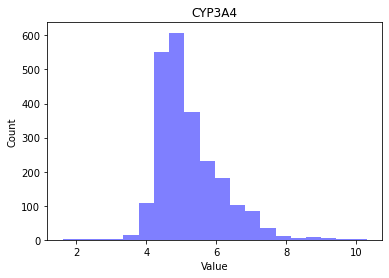

In [65]:
import atomsci.ddm.utils.curate_data as curate_data
imp.reload(curate_data)

data = temp_df
column = 'PIC50' #'VALUE_NUM_mean'
num_bins = 20
units = 'NM' #'log nm'
filepath = ""
title = target.upper()
data=temp_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [77]:
old_compound_id='rdkit_smiles'
new_compound_id='base_rdkit_smiles'

# Takes all the compounds that aren't part of the curated data frame and prints them
reject=smiles_df[~smiles_df[old_compound_id].isin(temp_df[new_compound_id])]
[reject.shape]
reject.head(2)

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
19,CHEMBL2029678,ACDVIHRBYWUYPZ-HNNXBMFYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,26812066.0,...,Inhibition of CYP3A4 (unknown origin) in absen...,Discovery of (R)-6-(1-(8-Fluoro-6-(1-methyl-1H...,J. Med. Chem.,PUBLICATION,NaN,5.823909,15,44473400,CC1=NSC(=C1)N2C=CC3=C(C2=O)N(N=N3)C(C)C4=CC5=C...,COCCOc1cnc2ccc(C(C)n3nnc4ccn(-c5cc(C)ns5)c(=O)...
20,CHEMBL2029678,ACDVIHRBYWUYPZ-HNNXBMFYSA-N,NaN,NaN,P08684,CYTOCHROME P450 3A4,CYP3A4,NaN,NaN,26812066.0,...,Inhibition of CYP3A4 (unknown origin) in prese...,Discovery of (R)-6-(1-(8-Fluoro-6-(1-methyl-1H...,J. Med. Chem.,PUBLICATION,NaN,4.677781,15,44473400,CC1=NSC(=C1)N2C=CC3=C(C2=O)N(N=N3)C(C)C4=CC5=C...,COCCOc1cnc2ccc(C(C)n3nnc4ccn(-c5cc(C)ns5)c(=O)...


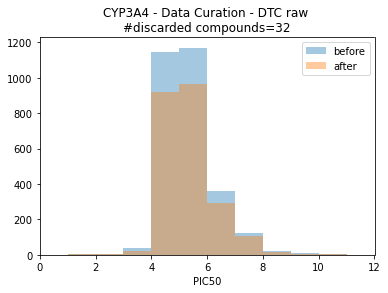

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
before=smiles_df["PIC50"]
after=temp_df["PIC50"] 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])
plt.title(target.upper() +' - Data Curation - DTC raw \n#discarded compounds='+str(reject[compound_id].nunique()));